In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_excel(r'C:\Users\Abdul Ghafar Qasemi\Desktop\schulich\AI Fundemental\Assignment\Data_SFD_Data_Toronto_Police.xlsx')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

In [35]:
#delete x,y cause they don't have any meanings
df.drop(columns=['X', 'Y'], inplace=True)

In [36]:
#add a column called 'If_Shooting' to define if objectid have death or injuries : if death >0 or injuries >0 then If_Shooting =1, if if death =0 and injuries =0 then If_Shooting =0
df['If_Shooting'] = ((df['DEATH'] > 0) | (df['INJURIES'] > 0)).astype(int)
df.loc[(df['DEATH'] == 0) & (df['INJURIES'] == 0), 'If_Shooting'] = 0

In [37]:
#add a column called 'Sum_Shooting' to do sum of death and injuries
df['Sum_Shooting'] = df['DEATH']+ df['INJURIES']

In [38]:
#use Canada holiday date to define 'Holiday_Status': holiday(include weekends), holiday_eve(2 days before holiday exclude weekends), workday
#I can only fine the days from 2019-2024: https://www.statutoryholidays.com/2019.php
# too much data and work to groupy this variable, pending 

In [39]:
#define the 'Office_hour': 9am-6pm office hour, others are non office hour
df['Office_hour'] = ((df['OCC_HOUR'] > 8) & (df['OCC_HOUR'] < 17)).astype(int)

In [40]:
df.head()

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,...,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,If_Shooting,Sum_Shooting,Office_hour
0,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,...,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528,0,0,0
1,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,...,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,0,0,0
2,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,...,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,1,2,1
3,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,...,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,1,1,0
4,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,...,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075,0,0,0


In [41]:
#replace month, dow to numbers
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Replace the month abbreviations with corresponding numbers
df['OCC_MONTH'] = df['OCC_MONTH'].str.slice(stop=3).map(month_dict)


In [42]:

# Define a dictionary of day abbreviations and corresponding numbers
day_dict = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Replace the day abbreviations with corresponding numbers
df['OCC_DOW'] = df['OCC_DOW'].map(day_dict)

In [43]:
# no missing value
null_counts = df.isnull().sum()
print(null_counts)

OBJECTID             0
EVENT_UNIQUE_ID      0
OCC_DATE             0
OCC_YEAR             0
OCC_MONTH            0
OCC_DOW              0
OCC_DOY              0
OCC_DAY              0
OCC_HOUR             0
OCC_TIME_RANGE       0
DIVISION             0
DEATH                0
INJURIES             0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
If_Shooting          0
Sum_Shooting         0
Office_hour          0
dtype: int64


In [44]:
#through mean, max, min we can see time variables are in the right range
df.describe(include='all')

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,...,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,If_Shooting,Sum_Shooting,Office_hour
count,5707.000000,5707,5707,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707,...,5707.000000,5707.0,5707,5707.0,5707,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000
unique,NaN,5707,3579,NaN,NaN,NaN,NaN,NaN,NaN,4,...,NaN,159.0,159,140.0,140,NaN,NaN,NaN,NaN,NaN
top,NaN,GO-2004397105,2019/08/05 04:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,Evening,...,NaN,25.0,Glenfield-Jane Heights,25.0,Glenfield-Jane Heights (25),NaN,NaN,NaN,NaN,NaN
freq,NaN,1,9,NaN,NaN,NaN,NaN,NaN,NaN,2307,...,NaN,311.0,311,304.0,304,NaN,NaN,NaN,NaN,NaN
mean,2854.000000,NaN,NaN,2014.460662,6.652006,4.211495,187.198178,15.901174,12.099527,NaN,...,0.488172,NaN,NaN,NaN,NaN,-79.481115,43.244138,0.495357,0.610654,0.163659
std,1647.613324,NaN,NaN,5.468803,3.274906,2.053769,100.269326,8.819631,8.685588,NaN,...,0.779148,NaN,NaN,NaN,NaN,0.640212,4.532671,0.500022,0.839658,0.369998
min,1.000000,NaN,NaN,2004.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,-85.488744,0.000000,0.000000,0.000000,0.000000
25%,1427.500000,NaN,NaN,2010.000000,4.000000,2.000000,106.000000,8.000000,3.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,-79.513346,43.676604,0.000000,0.000000,0.000000
50%,2854.000000,NaN,NaN,2016.000000,7.000000,4.000000,192.000000,16.000000,15.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,-79.439740,43.720796,0.000000,0.000000,0.000000
75%,4280.500000,NaN,NaN,2019.000000,9.000000,6.000000,268.000000,23.000000,20.000000,NaN,...,1.000000,NaN,NaN,NaN,NaN,-79.328082,43.755306,1.000000,1.000000,0.000000


<AxesSubplot:xlabel='DEATH', ylabel='Count'>

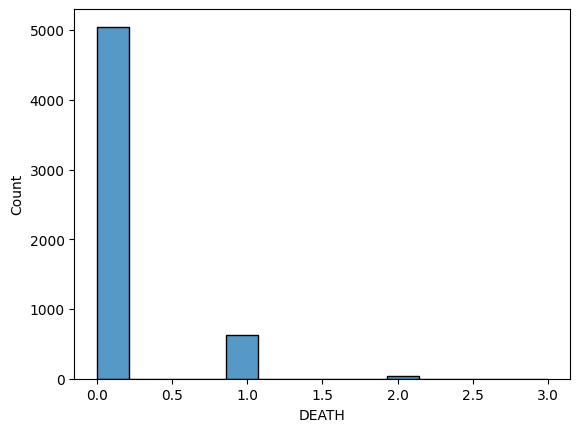

In [45]:
# see more about death and injuries， if any outliers
sns.histplot(df['DEATH'])

<AxesSubplot:xlabel='INJURIES', ylabel='Count'>

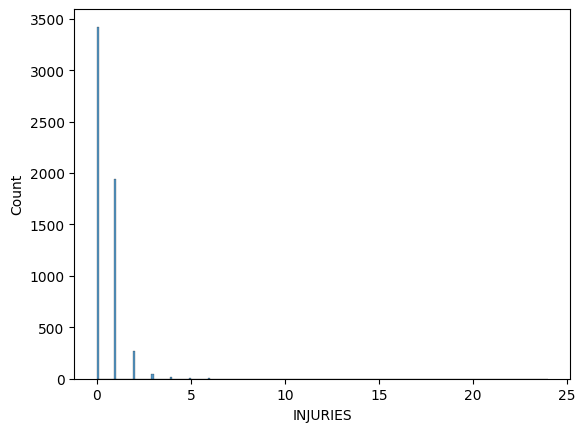

In [46]:
sns.histplot(df['INJURIES'])

In [47]:
# how many shooting case happend, and death/inguries happend among different neighborhoods(new) since 2004
df_n= df.groupby(['NEIGHBOURHOOD_158']).agg({'OBJECTID': 'count', 'If_Shooting': 'sum', 'Sum_Shooting': 'sum'}).reset_index().sort_values(by='OBJECTID',ascending=True)

In [48]:
#choose the lowest 25% neighbourhoods as safe places for business : lowest 50
df_n.describe(include='all')

,NEIGHBOURHOOD_158,OBJECTID,If_Shooting,Sum_Shooting
count,159,159.000000,159.000000,159.000000
unique,159,NaN,NaN,NaN
top,Lawrence Park South,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,35.893082,17.779874,21.918239
std,NaN,41.898701,20.034985,25.237597
min,NaN,1.000000,0.000000,0.000000
25%,NaN,9.000000,5.000000,5.500000
50%,NaN,21.000000,10.000000,13.000000
75%,NaN,46.500000,24.500000,30.500000


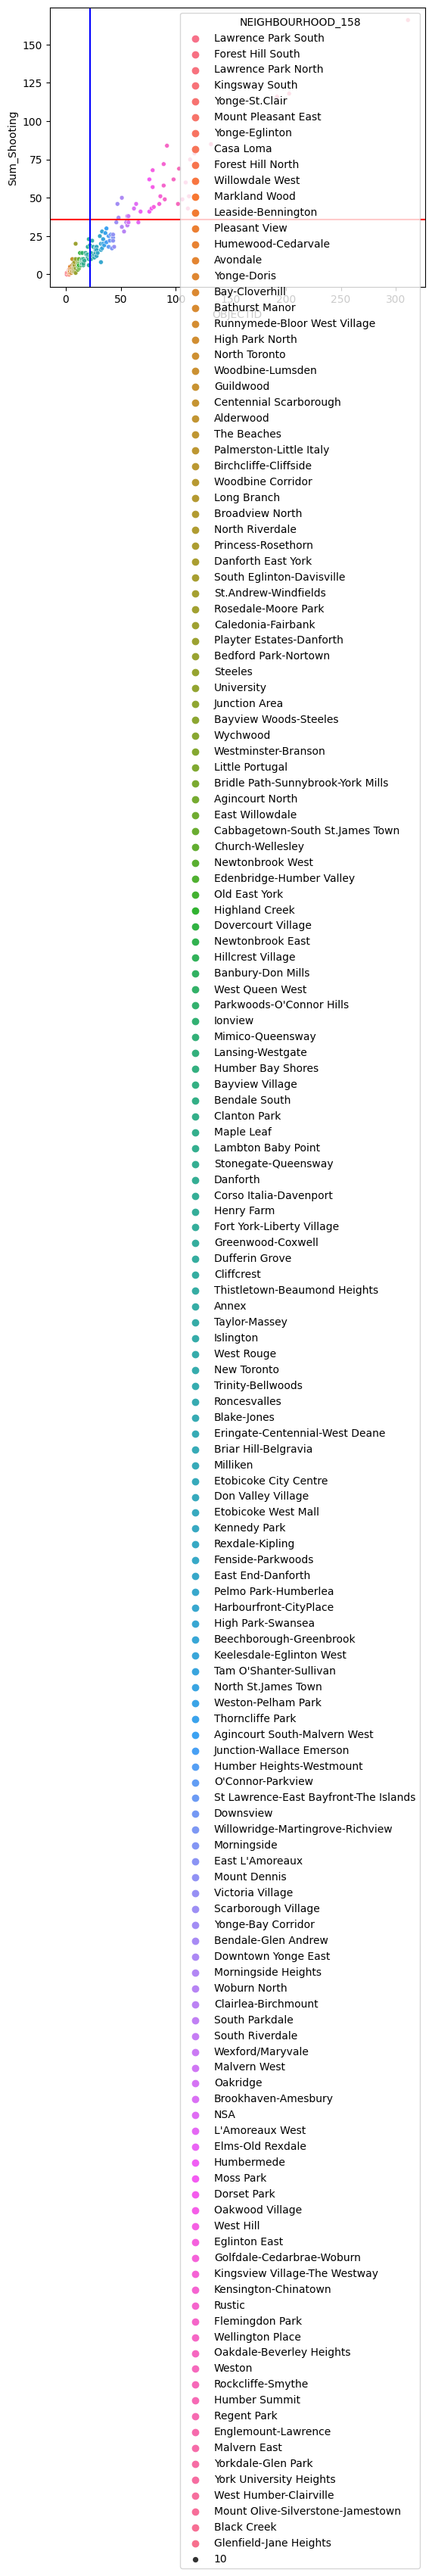

In [49]:
# to be fair, consider the serious level: so make cross plot of crime case and sum case numbers
sns.scatterplot(x='OBJECTID',y='Sum_Shooting',data=df_n,hue='NEIGHBOURHOOD_158',size=10)
plt.axhline(df_n['OBJECTID'].mean(), c='red')
plt.axvline(df_n['Sum_Shooting'].mean(), c='blue')

#some are both high in 2 dimensions--risky, some are both low--safer

In [50]:
#select both below 25%: safer place to choose  ( It has ethical issue and better to avoid or not say)
df_l=df_n[(df_n['OBJECTID']<9)&(df_n['Sum_Shooting']<5.5)]
print(df_l)

                NEIGHBOURHOOD_158  OBJECTID  If_Shooting  Sum_Shooting
81            Lawrence Park South         1            0             0
51              Forest Hill South         1            0             0
80            Lawrence Park North         1            1             1
76                 Kingsway South         2            1             1
156                Yonge-St.Clair         3            2             2
96            Mount Pleasant East         3            2             2
155                Yonge-Eglinton         3            3             3
23                      Casa Loma         3            0             0
50              Forest Hill North         3            1             1
147               Willowdale West         3            1             1
88                  Markland Wood         4            1             1
82             Leaside-Bennington         4            3             3
113                 Pleasant View         4            1             1
67    

In [51]:
#select both higher than 25%: dangerous places to avoid ( Why Objectid, isn't it  can create biases?)
df_h=df_n[(df_n['OBJECTID']>46.5)&(df_n['Sum_Shooting']>30.5)]
print(df_h)

                     NEIGHBOURHOOD_158  OBJECTID  If_Shooting  Sum_Shooting
153                 Yonge-Bay Corridor        47           30            46
13                 Bendale-Glen Andrew        48           31            37
36                 Downtown Yonge East        51           41            50
92                 Morningside Heights        51           25            31
26                 Clairlea-Birchmount        55           30            34
124                     South Parkdale        56           26            32
125                    South Riverdale        56           31            38
146                   Wexford/Maryvale        57           31            38
86                        Malvern West        57           31            34
106                           Oakridge        57           26            34
20                 Brookhaven-Amesbury        62           32            43
97                                 NSA        64           44            46
77          

In [52]:
df_time_h=df.groupby(['NEIGHBOURHOOD_158','OCC_YEAR','OCC_MONTH','OCC_DATE','OCC_DOW','OCC_TIME_RANGE','Office_hour']).agg({'OBJECTID': 'count', 'If_Shooting': 'sum', 'Sum_Shooting': 'sum'}).reset_index()[df['NEIGHBOURHOOD_158'].isin(['Yonge-Bay Corridor','Bendale-Glen Andrew','Downtown Yonge East','Morningside Heights','Clairlea-Birchmount','South Parkdale','South Riverdale','Wexford/Maryvale','Malvern West','Oakridge','Brookhaven-Amesbury','NSA',"L'Amoreaux West",'Elms-Old Rexdale','Humbermede','Moss Park','Dorset Park','Oakwood Village','West Hill','Eglinton East','Golfdale-Cedarbrae-Woburn','Kingsview Village-The Westway','Kensington-Chinatown','Rustic','Flemingdon Park','Wellington Place','Oakdale-Beverley Heights','Weston','Rockcliffe-Smythe','Humber Summit','Regent Park','Englemount-Lawrence','Malvern East','Yorkdale-Glen Park','York University Heights','West Humber-Clairville','Mount Olive-Silverstone-Jamestown','Black Creek','Glenfield-Jane Heights'])]

C:\Users\Abdul Ghafar Qasemi\AppData\Local\Temp\ipykernel_15100\426598199.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_time_h=df.groupby(['NEIGHBOURHOOD_158','OCC_YEAR','OCC_MONTH','OCC_DATE','OCC_DOW','OCC_TIME_RANGE','Office_hour']).agg({'OBJECTID': 'count', 'If_Shooting': 'sum', 'Sum_Shooting': 'sum'}).reset_index()[df['NEIGHBOURHOOD_158'].isin(['Yonge-Bay Corridor','Bendale-Glen Andrew','Downtown Yonge East','Morningside Heights','Clairlea-Birchmount','South Parkdale','South Riverdale','Wexford/Maryvale','Malvern West','Oakridge','Brookhaven-Amesbury','NSA',"L'Amoreaux West",'Elms-Old Rexdale','Humbermede','Moss Park','Dorset Park','Oakwood Village','West Hill','Eglinton East','Golfdale-Cedarbrae-Woburn','Kingsview Village-The Westway','Kensington-Chinatown','Rustic','Flemingdon Park','Wellington Place','Oakdale-Beverley Heights','Weston','Rockcliffe-Smythe','Humber Summit','Regent Park','Englemount-Lawrence','Malvern East','Yorkdale-Glen P

In [53]:
df_time_h

,NEIGHBOURHOOD_158,OCC_YEAR,OCC_MONTH,OCC_DATE,OCC_DOW,OCC_TIME_RANGE,Office_hour,OBJECTID,If_Shooting,Sum_Shooting
1,Agincourt North,2008,3,2008/03/27 04:00:00+00,4,Evening,0,1,0,0
2,Agincourt North,2010,9,2010/09/02 04:00:00+00,4,Afternoon,0,1,0,0
3,Agincourt North,2012,9,2012/09/04 04:00:00+00,2,Night,0,1,0,0
4,Agincourt North,2016,10,2016/10/11 04:00:00+00,2,Afternoon,1,1,1,1
6,Agincourt North,2019,4,2019/04/04 04:00:00+00,4,Evening,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
5636,Yorkdale-Glen Park,2021,5,2021/05/23 04:00:00+00,7,Afternoon,1,1,0,0
5637,Yorkdale-Glen Park,2021,5,2021/05/24 04:00:00+00,1,Afternoon,1,1,0,0
5638,Yorkdale-Glen Park,2021,7,2021/07/28 04:00:00+00,3,Evening,0,1,1,2
5639,Yorkdale-Glen Park,2021,8,2021/08/29 04:00:00+00,7,Afternoon,1,1,0,0


Text(0, 0.5, 'OBJECTID')

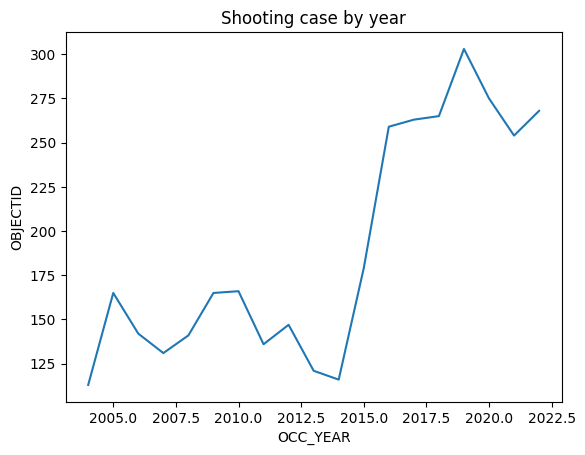

In [54]:
#if u really want to visit the dangerous place, u'd better avoid this period of time
#1. by year 
df_time_h_sum_y = df_time_h.groupby('OCC_YEAR')['OBJECTID'].sum().reset_index()

sns.lineplot(x='OCC_YEAR', y='OBJECTID', data=df_time_h_sum_y)
plt.title('Shooting case by year')
plt.xlabel('OCC_YEAR')
plt.ylabel('OBJECTID')

#since 2016 it rokects

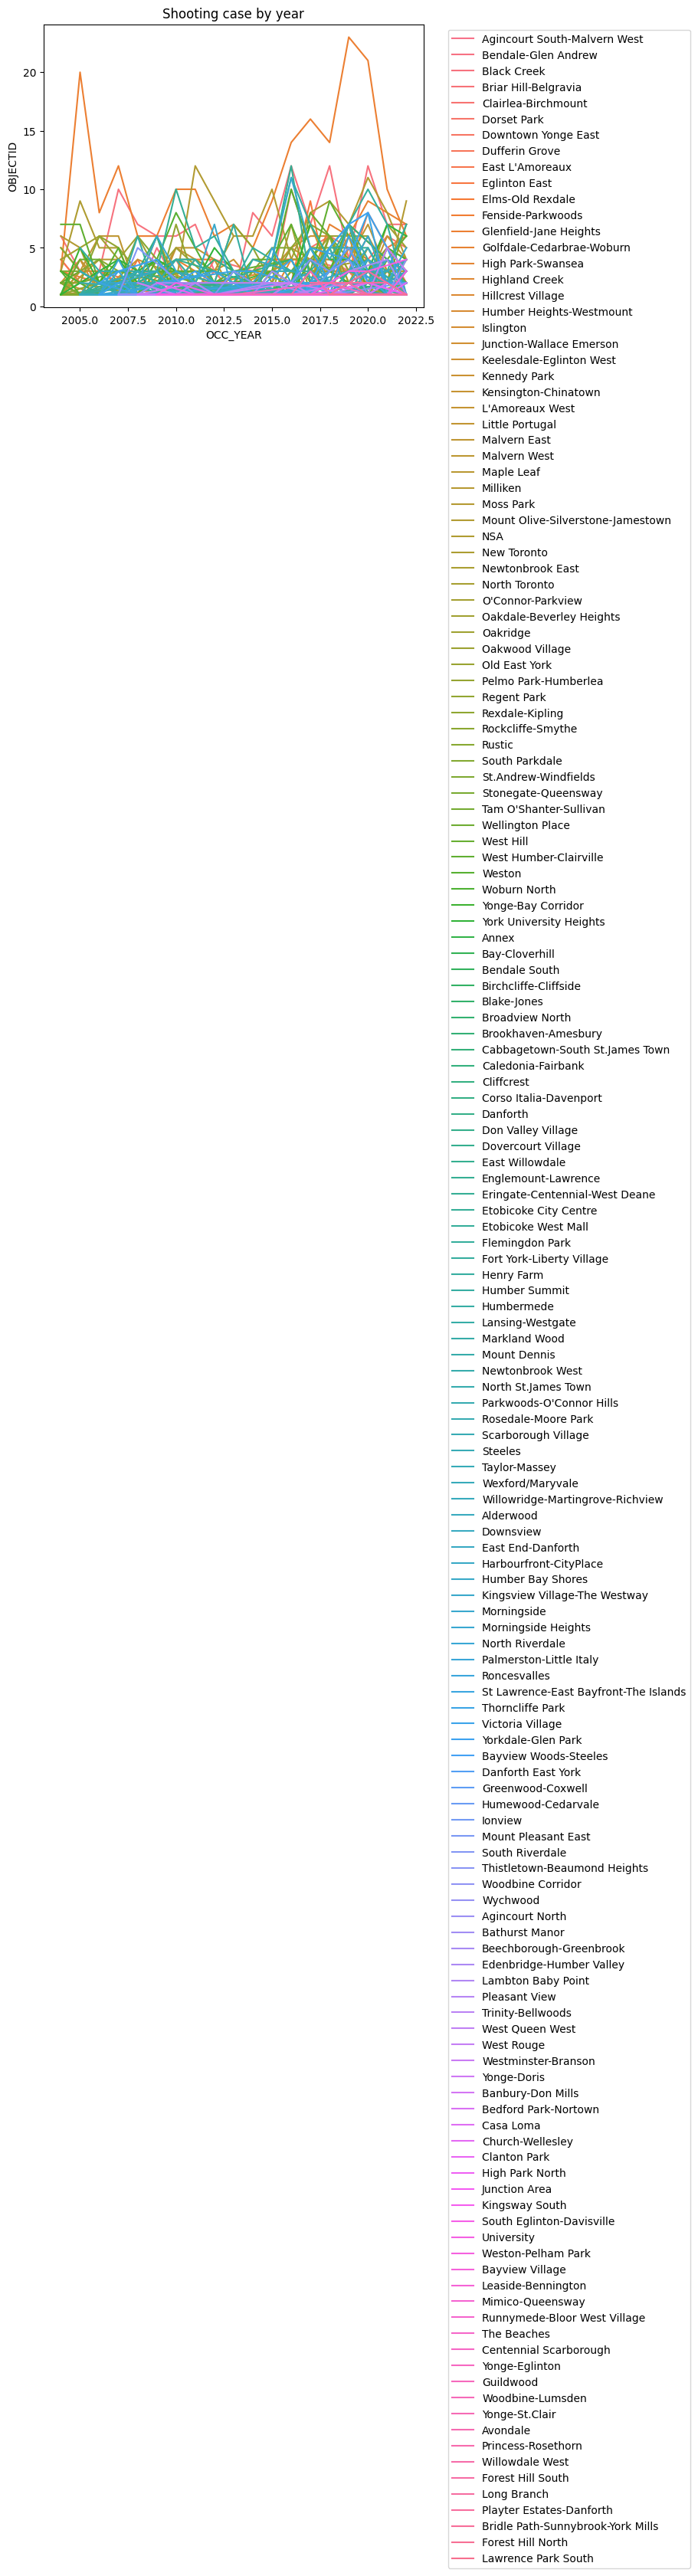

In [55]:
df_time_h_sum_y_hue = df_time_h.groupby(['OCC_YEAR','NEIGHBOURHOOD_158'])['OBJECTID'].sum().reset_index()

sns.lineplot(x='OCC_YEAR', y='OBJECTID', data=df_time_h_sum_y_hue,hue='NEIGHBOURHOOD_158')
plt.title('Shooting case by year')
plt.xlabel('OCC_YEAR')
plt.ylabel('OBJECTID')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0, 0.5, 'OBJECTID')

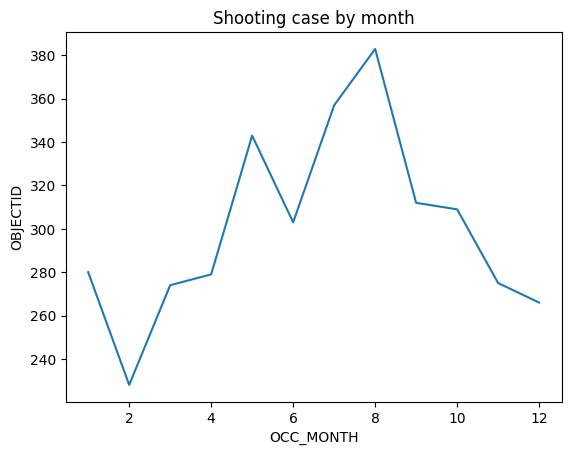

In [56]:
#2. By month
df_time_h_sum = df_time_h.groupby('OCC_MONTH')['OBJECTID'].sum().reset_index()

# Plotting the line plot with the updated DataFrame
sns.lineplot(x='OCC_MONTH', y='OBJECTID', data=df_time_h_sum)

plt.title('Shooting case by month')
plt.xlabel('OCC_MONTH')
plt.ylabel('OBJECTID')


#if u want to go there, avoid summer time(July August)

In [57]:
df_time_h_sum_hue = df_time_h.groupby(['OCC_MONTH','NEIGHBOURHOOD_158'])['OBJECTID'].sum().reset_index()


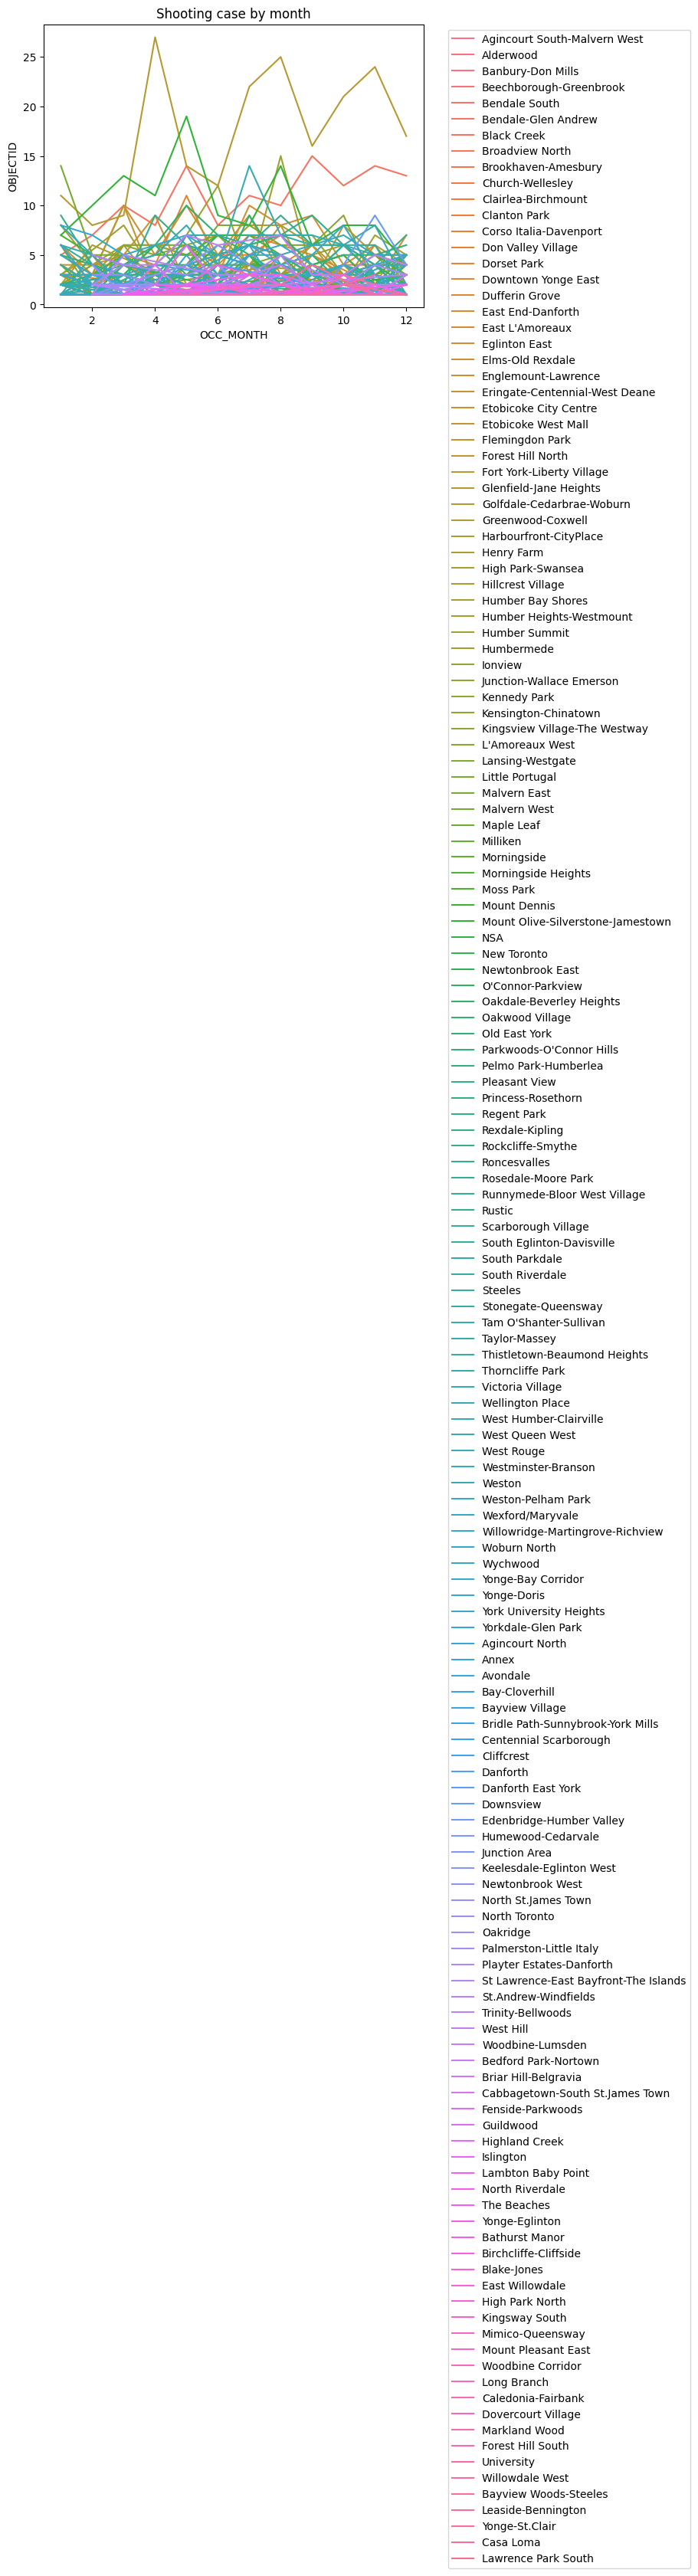

In [58]:
sns.lineplot(x='OCC_MONTH', y='OBJECTID', data=df_time_h_sum_hue, hue='NEIGHBOURHOOD_158')

plt.title('Shooting case by month')
plt.xlabel('OCC_MONTH')
plt.ylabel('OBJECTID')

# adjust the legend location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

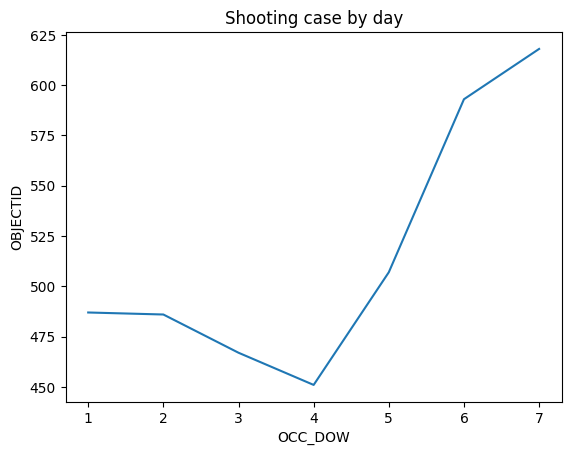

In [59]:
#if u really want to visit the dangerous place, u'd better avoid this period of time
#1. by shift 
df_time_h_sum_d = df_time_h.groupby('OCC_DOW')['OBJECTID'].sum().reset_index()

sns.lineplot(x='OCC_DOW', y='OBJECTID', data=df_time_h_sum_d)
plt.title('Shooting case by day')
plt.xlabel('OCC_DOW')
plt.ylabel('OBJECTID')
plt.show()
#Near the weekend from Thursday upto sunday has upward trend

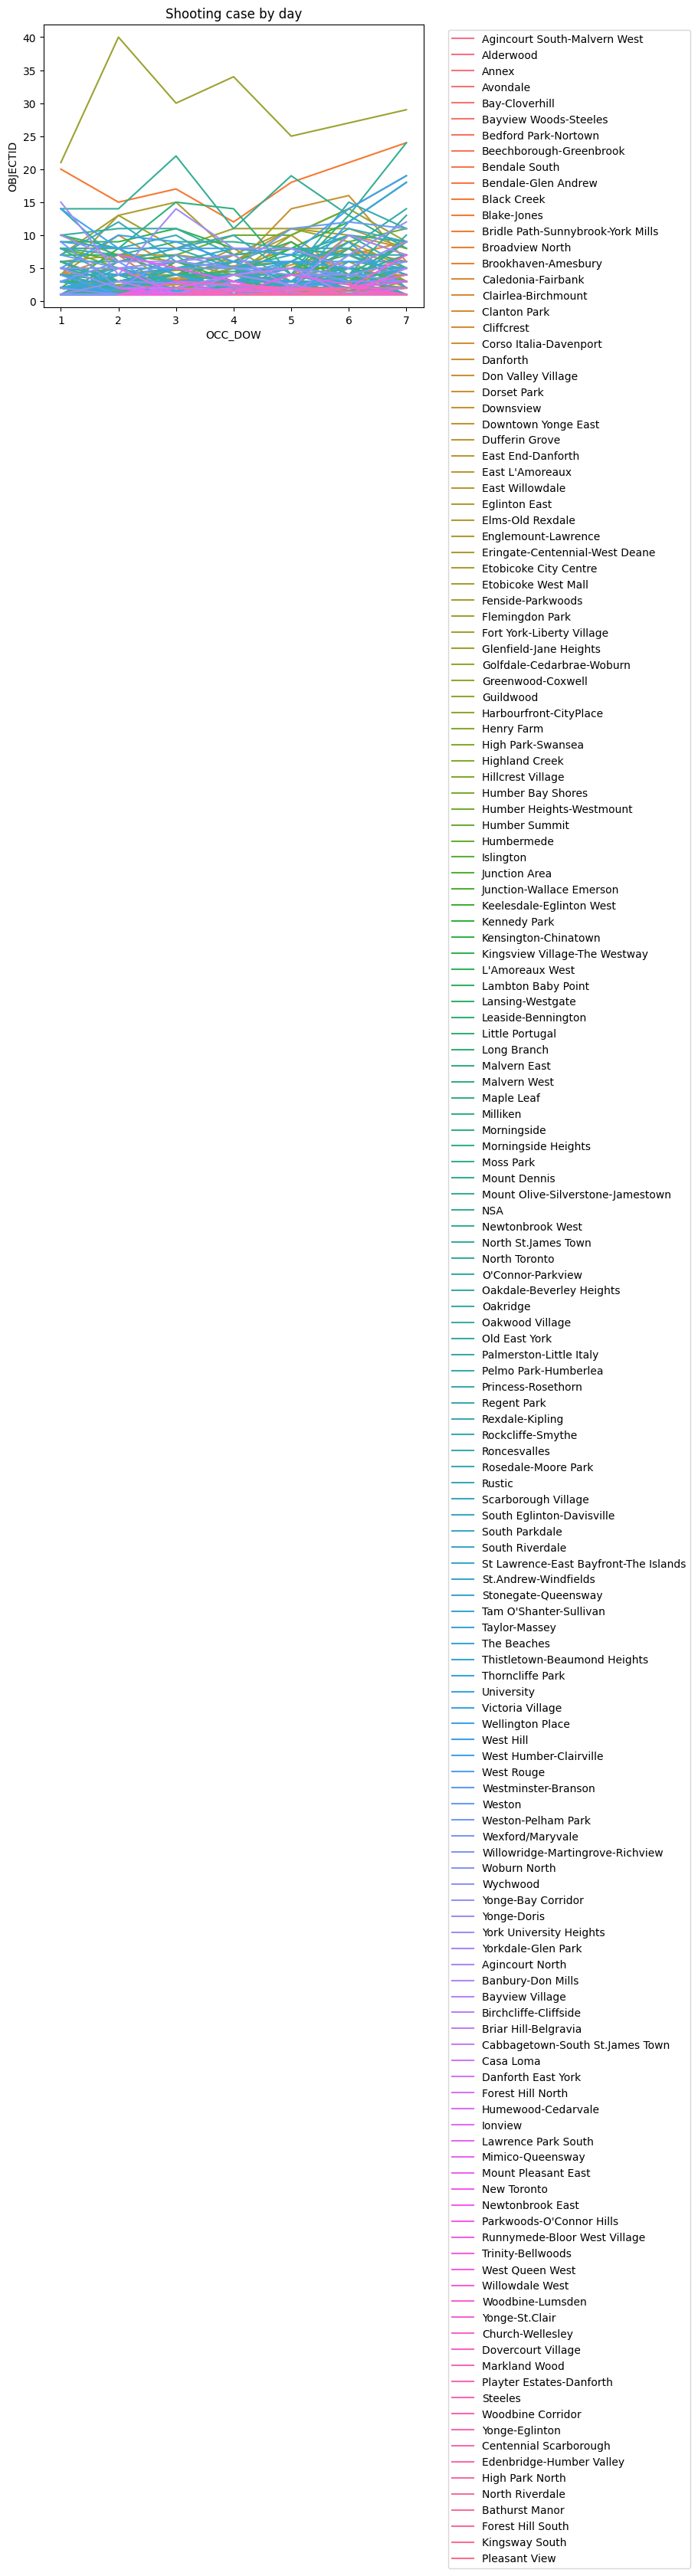

In [60]:
df_time_h_sum_d_hue = df_time_h.groupby(['OCC_DOW','NEIGHBOURHOOD_158'])['OBJECTID'].sum().reset_index()

sns.lineplot(x='OCC_DOW', y='OBJECTID', data=df_time_h_sum_d_hue,hue='NEIGHBOURHOOD_158')
plt.title('Shooting case by day')
plt.xlabel('OCC_DOW')
plt.ylabel('OBJECTID')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0, 0.5, 'OBJECTID')

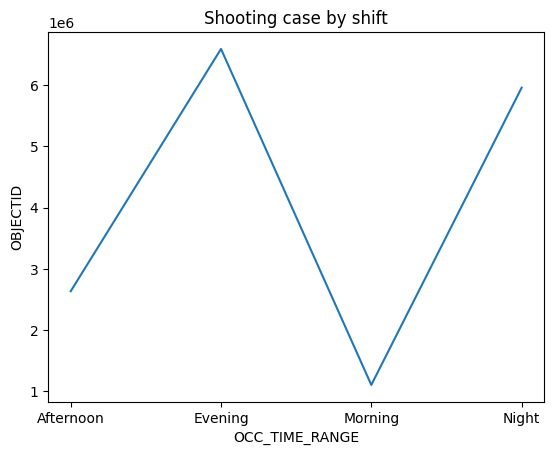

In [61]:
df_time_h_sum_s = df.groupby('OCC_TIME_RANGE')['OBJECTID'].sum().reset_index()
sns.lineplot(x='OCC_TIME_RANGE', y='OBJECTID', data=df_time_h_sum_s)
plt.title('Shooting case by shift')
plt.xlabel('OCC_TIME_RANGE')
plt.ylabel('OBJECTID')
# it seems during the day crimes happened more

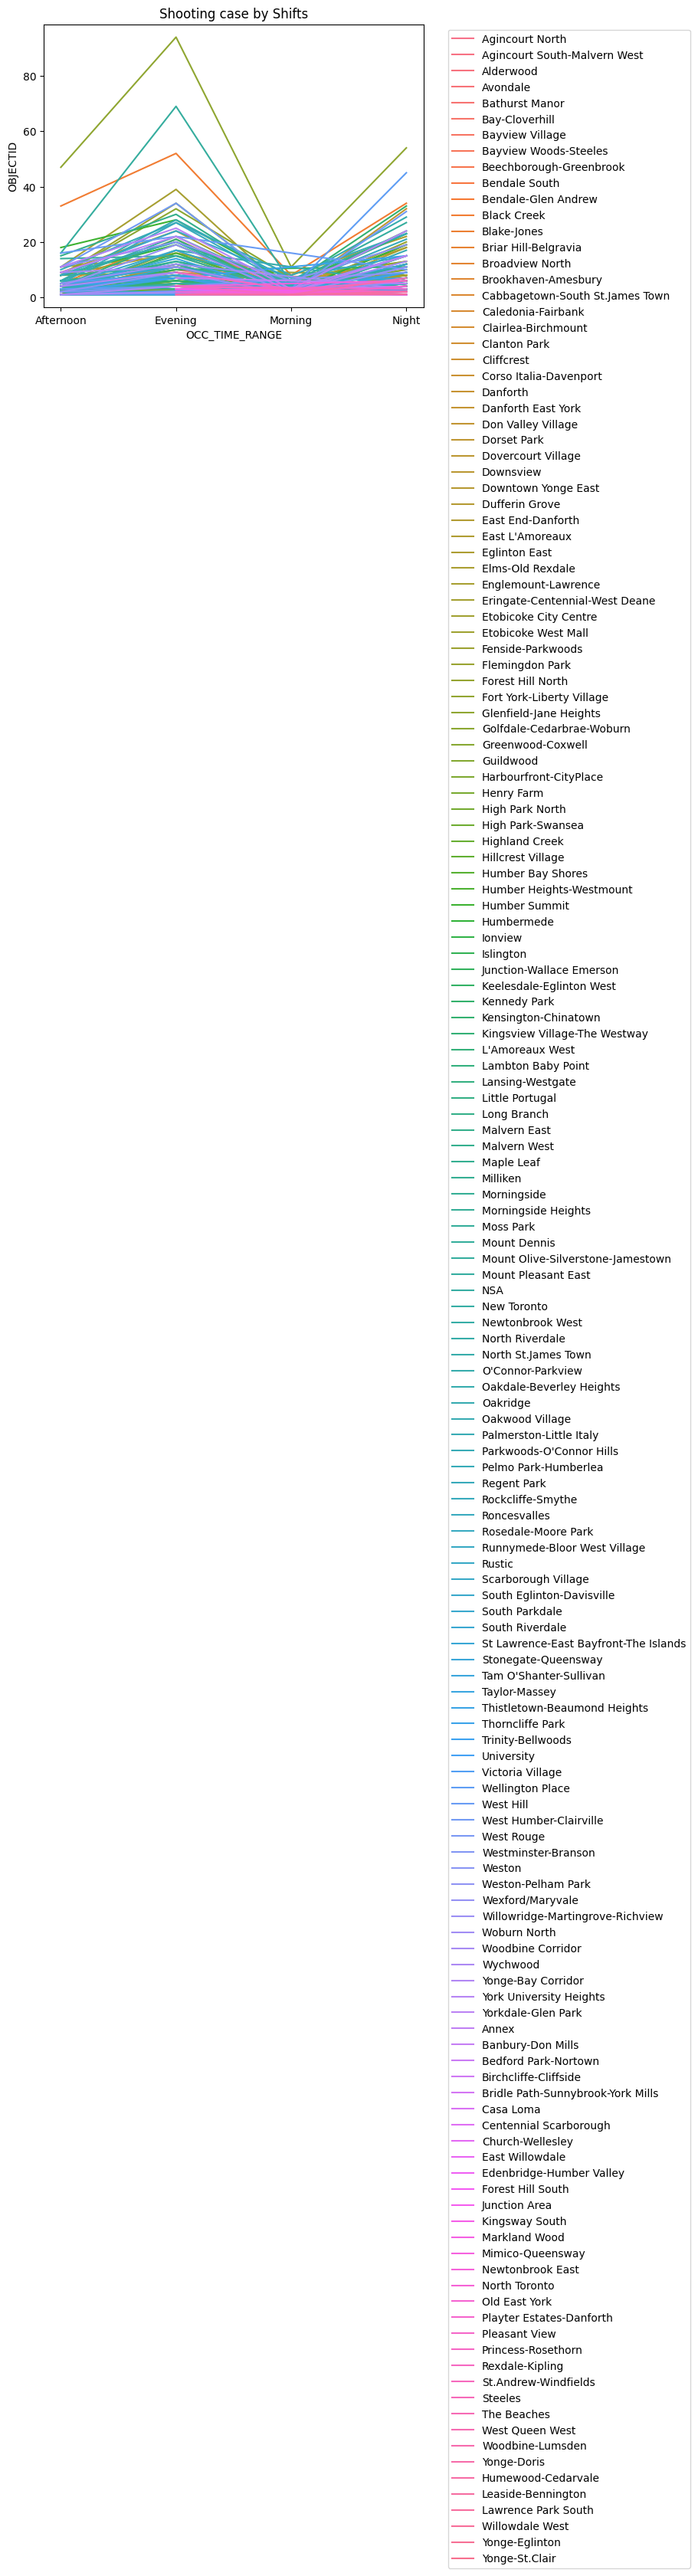

In [64]:
df_time_h_sum_s_hue = df_time_h.groupby(['OCC_TIME_RANGE','NEIGHBOURHOOD_158'])['OBJECTID'].sum().reset_index()

sns.lineplot(x='OCC_TIME_RANGE', y='OBJECTID', data=df_time_h_sum_s_hue, hue='NEIGHBOURHOOD_158')
plt.title('Shooting case by Shifts')
plt.xlabel('OCC_TIME_RANGE')
plt.ylabel('OBJECTID')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [66]:
#Shootings in NEIGHBOURHOOD_140 
df_n140= df.groupby(['NEIGHBOURHOOD_140']).agg({'OBJECTID': 'count', 'If_Shooting': 'sum', 'Sum_Shooting': 'sum'}).reset_index().sort_values(by='OBJECTID',ascending=True)

In [67]:
df_n140.describe(include='all')

,NEIGHBOURHOOD_140,OBJECTID,If_Shooting,Sum_Shooting
count,140,140.000000,140.000000,140.000000
unique,140,NaN,NaN,NaN
top,Forest Hill South (101),NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,40.764286,20.192857,24.892857
std,NaN,47.155736,22.545524,28.206509
min,NaN,1.000000,0.000000,0.000000
25%,NaN,9.000000,5.000000,6.000000
50%,NaN,24.000000,12.000000,15.000000
75%,NaN,53.750000,30.250000,36.500000


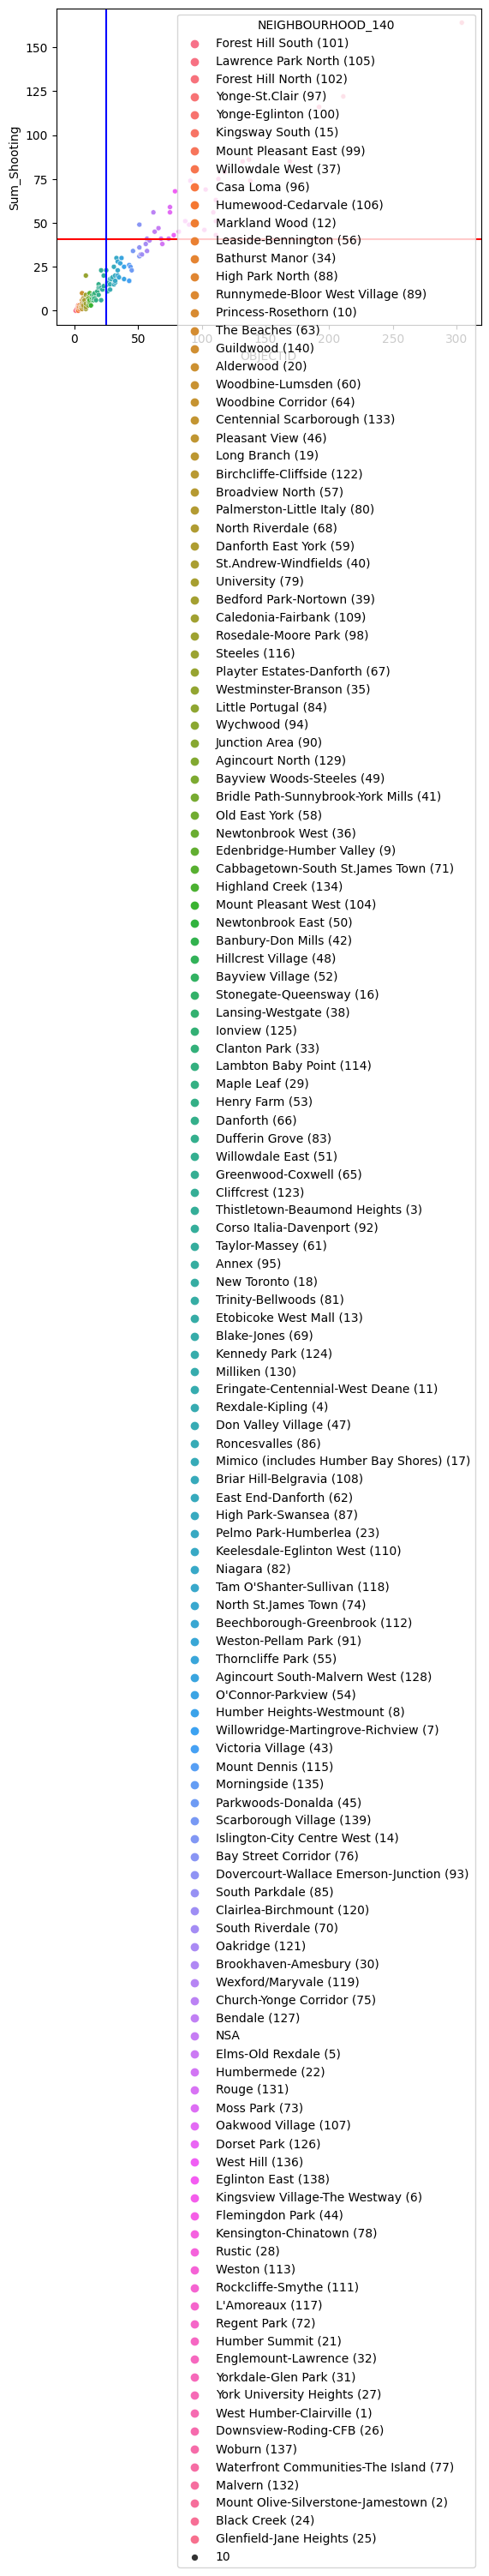

In [75]:
sns.scatterplot(x='OBJECTID', y='Sum_Shooting', data=df_n140, hue='NEIGHBOURHOOD_140', size= 10)
plt.axhline(df_n140['OBJECTID'].mean(), c='red')
plt.axvline(df_n140['Sum_Shooting'].mean(), c='blue')

In [80]:
# Select both below 25%: Safer place
df_l140 = df_n140[(df_n140['OBJECTID'] < 9) & (df_n140['Sum_Shooting'] < 5.5)]
print(df_l140)

                     NEIGHBOURHOOD_140  OBJECTID  If_Shooting  Sum_Shooting
44             Forest Hill South (101)         1            0             0
68           Lawrence Park North (105)         2            1             1
43             Forest Hill North (102)         3            1             1
137                Yonge-St.Clair (97)         3            2             2
136               Yonge-Eglinton (100)         3            3             3
64                 Kingsway South (15)         3            2             2
81            Mount Pleasant East (99)         3            2             2
130               Willowdale West (37)         3            1             1
21                      Casa Loma (96)         3            0             0
56            Humewood-Cedarvale (106)         4            3             3
74                  Markland Wood (12)         4            1             1
69             Leaside-Bennington (56)         4            3             3
5           

In [81]:
df_h140 = df_n140[(df_n140['OBJECTID'] > 46.5) & (df_n140['Sum_Shooting'] > 30.5)]
print(df_h140)

                            NEIGHBOURHOOD_140  OBJECTID  If_Shooting  \
58            Islington-City Centre West (14)        51           27   
6                    Bay Street Corridor (76)        51           33   
32   Dovercourt-Wallace Emerson-Junction (93)        51           31   
109                       South Parkdale (85)        52           26   
24                  Clairlea-Birchmount (120)        53           28   
110                      South Riverdale (70)        56           31   
91                             Oakridge (121)        57           26   
18                   Brookhaven-Amesbury (30)        57           30   
128                    Wexford/Maryvale (119)        59           33   
23                 Church-Yonge Corridor (75)        62           47   
11                              Bendale (127)        63           38   
83                                        NSA        66           45   
38                       Elms-Old Rexdale (5)        68         